**Regression:**

**Data Preparation Code (Binary Target: DepDel15):**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("cleaned_merged_data.csv")

In [3]:
# Drop rows with missing target values and convert target to integer
df = df.dropna(subset=["DepDel15"]).copy()
df["DepDel15"] = df["DepDel15"].astype(int)

In [4]:
# Define features and target
features = ['Airline', 'Origin', 'Dest', 'DepTimeBlk', 'Month', 'DayOfWeek']
X = df[features].astype(str)
y = df["DepDel15"]

In [5]:
# Encode categorical features
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


**Train-Test Split:**

In [6]:
# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

        Airline  Origin  Dest  DepTimeBlk  Month  DayOfWeek
154306       15      60     0           5      3          6
272581       15      28     0          10      0          2
146735       11      36     0           2      3          0
102246       12      63     0           8     11          2
64063        11       8     0          11     10          1
        Airline  Origin  Dest  DepTimeBlk  Month  DayOfWeek
182623       12     121     0           4      9          0
8558         15     163     0           7      6          5
26629        11      90     0           9      4          0
190965       11      94     0           1      7          5
133316        7      97     0          17      1          1
154306    0
272581    0
146735    0
102246    0
64063     0
Name: DepDel15, dtype: int64
182623    0
8558      0
26629     0
190965    0
133316    1
Name: DepDel15, dtype: int64


**Logistic Regression & Multinomial Naïve Bayes Modeling Code:**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("X_train (Features):")
print(X_train.head())
# Display corresponding training labels
print("\ny_train (Target):")
print(y_train.head())


X_train (Features):
        Airline  Origin  Dest  DepTimeBlk  Month  DayOfWeek
154306       15      60     0           5      3          6
272581       15      28     0          10      0          2
146735       11      36     0           2      3          0
102246       12      63     0           8     11          2
64063        11       8     0          11     10          1

y_train (Target):
154306    0
272581    0
146735    0
102246    0
64063     0
Name: DepDel15, dtype: int64


In [8]:
# Train Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("X_train (Features):")
print(X_train.head())
# Display corresponding training labels
print("\ny_train (Target):")
print(y_train.head())


X_train (Features):
        Airline  Origin  Dest  DepTimeBlk  Month  DayOfWeek
154306       15      60     0           5      3          6
272581       15      28     0          10      0          2
146735       11      36     0           2      3          0
102246       12      63     0           8     11          2
64063        11       8     0          11     10          1

y_train (Target):
154306    0
272581    0
146735    0
102246    0
64063     0
Name: DepDel15, dtype: int64


In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def evaluate_model(y_test, y_pred, title):
    print(f"\n {title}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**Evaluation of the Models:**


 Logistic Regression
Accuracy: 0.8153007417999821
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     45612
           1       0.00      0.00      0.00     10333

    accuracy                           0.82     55945
   macro avg       0.41      0.50      0.45     55945
weighted avg       0.66      0.82      0.73     55945



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


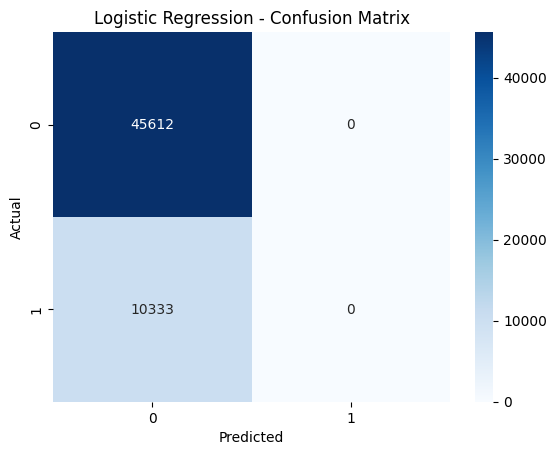

In [11]:

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")



 Multinomial Naive Bayes
Accuracy: 0.7404593797479667
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     45612
           1       0.27      0.25      0.26     10333

    accuracy                           0.74     55945
   macro avg       0.55      0.55      0.55     55945
weighted avg       0.73      0.74      0.73     55945



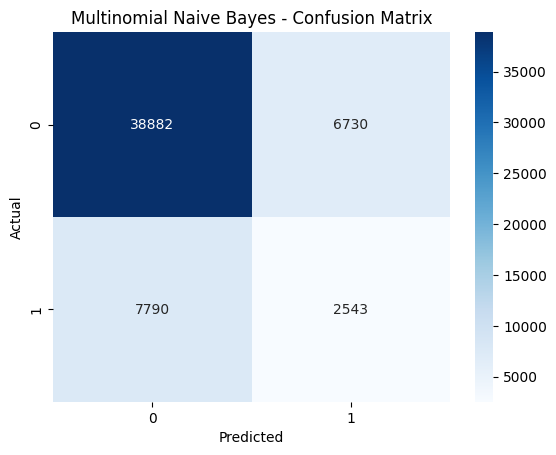

In [12]:
evaluate_model(y_test, y_pred_nb, "Multinomial Naive Bayes")